In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
import PIL
from PIL import Image
import numpy as np
import math

In [4]:
uploaded = files.upload()
img = Image.open(BytesIO(uploaded['lena.png']))

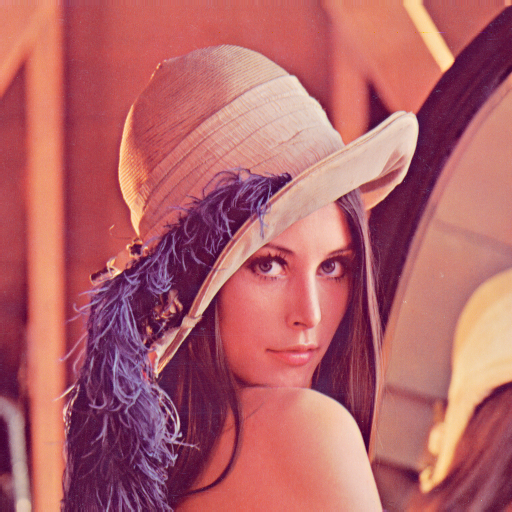

In [5]:
rgb = img.convert("RGB")
width,height = rgb.size
gray = Image.new('L', (width, height))


for x in range(width):
    for y in range(height):
        r, g, b = img.getpixel((x, y))
        value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
        value = int(value)
        gray.putpixel((x, y), value)

rgb
#gray

In [ ]:
rgb_val = np.array(rgb)
rgb_val

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [ ]:
gray_val = np.array(gray)
gray_val[0]

array([162, 162, 162, 161, 162, 156, 163, 160, 164, 160, 161, 159, 155,
       162, 159, 154, 157, 155, 161, 160, 153, 156, 154, 157, 154, 157,
       155, 151, 156, 154, 154, 156, 153, 157, 154, 159, 158, 166, 159,
       166, 166, 165, 166, 171, 170, 175, 173, 170, 171, 171, 167, 174,
       168, 166, 161, 160, 148, 148, 154, 140, 129, 118, 117, 105,  97,
        97,  94,  92,  87,  97, 102,  96, 102,  99, 103, 104, 105, 104,
       103, 110, 109, 107, 106, 105, 104, 109, 109, 109, 108, 107, 107,
       107, 110, 108, 106, 109, 109, 109, 109, 107, 103, 105, 105, 107,
       108, 110, 117, 110, 113, 117, 121, 118, 112, 122, 120, 121, 124,
       122, 121, 123, 124, 130, 129, 123, 122, 127, 132, 131, 131, 128,
       135, 129, 127, 130, 130, 127, 134, 136, 132, 133, 131, 130, 127,
       130, 134, 125, 129, 126, 133, 130, 129, 130, 128, 132, 128, 128,
       134, 133, 135, 133, 127, 134, 130, 134, 132, 133, 133, 135, 131,
       134, 130, 136, 134, 132, 133, 133, 136, 132, 134, 134, 13

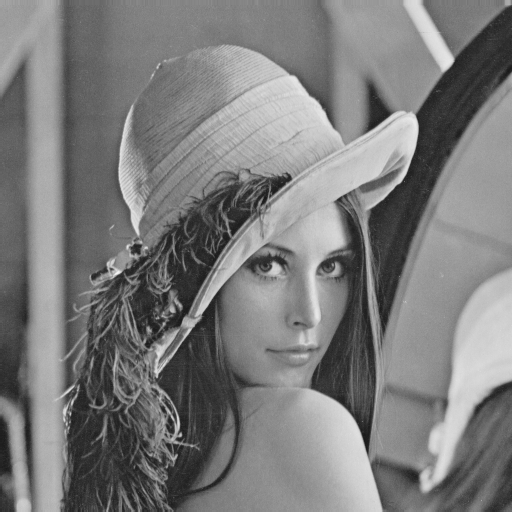

In [ ]:
# Creates PIL image
img = Image.fromarray(gray_val)
img

In [ ]:
row,col = gray.size
predc_mat = gray_val.copy()
predc_mat[0:2,0:2]



array([[162, 162],
       [162, 162]], dtype=uint8)

### Prediction Errors

In [ ]:
for i in range(1,row):
  for j in range(1,col):
    if gray_val[i,j] <= min(gray_val[i,j-1],gray_val[i-1,j]):
      px = max(gray_val[i,j-1],gray_val[i-1,j])
    elif gray_val[i,j] >= max(gray_val[i,j-1],gray_val[i-1,j]):
      px = min(gray_val[i,j-1],gray_val[i-1,j])
    else:
      px = gray_val[i,j-1] + gray_val[i-1,j] - gray_val[i,j]
    
    predc_mat[i,j] = gray_val[i,j] - px

predc_mat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


array([[162, 162, 162, ..., 169, 154, 128],
       [162,   0,   0, ..., 254, 241, 230],
       [162,   0,   0, ..., 254, 241, 230],
       ...,
       [ 42, 252,   7, ...,   5, 255,   0],
       [ 43,   1,  11, ...,   2,   5,   9],
       [ 43,   0,  11, ...,   3,   2,   2]], dtype=uint8)

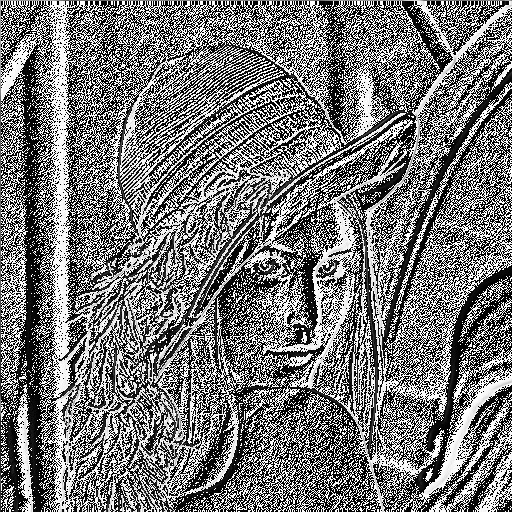

In [ ]:
img = Image.fromarray(predc_mat)
img

### Encrypted Values

In [ ]:
temp = predc_mat[0,0]
print(temp)
bin = []
for i in range(10):
      k = 2**i
      val = (math.floor(temp/2**(k-1)))%2
      bin.append(str(val))
new_integer = int(''.join(bin))
new_integer
print(row,col)

162
512 512


In [ ]:
#enc_mat = predc_mat[m,n].copy()
enc_mat = np.empty([row,col])
for m in range(row):
  for n in range(col):
    bin=[]
    temp = predc_mat[m,n]
    for i in range(9):
      k = 2**i
      val = (math.floor(temp/2**(k-1)))%2
      bin.append(str(val))
    bin.reverse()
    new_integer = str(''.join(bin))
    #temp_integer = new_integer.zfill(9)
   #new_integer = str(''.join(bin))
    enc_mat[m,n] = new_integer
    #np.append(enc_mat[m,n], new_integer)
    


#enc_mat = np.char.zfill(enc_mat, 9)

#enc_mat = enc_mat.astype(np.int64)
enc_mat



array([[1.010e+03, 1.010e+03, 1.010e+03, ..., 1.101e+03, 1.110e+03,
        1.000e+03],
       [1.010e+03, 0.000e+00, 0.000e+00, ..., 1.110e+03, 1.001e+03,
        1.010e+03],
       [1.010e+03, 0.000e+00, 0.000e+00, ..., 1.110e+03, 1.001e+03,
        1.010e+03],
       ...,
       [1.100e+02, 1.100e+03, 1.100e+01, ..., 1.000e+00, 1.111e+03,
        0.000e+00],
       [1.110e+02, 1.000e+00, 1.110e+02, ..., 1.000e+01, 1.000e+00,
        1.010e+02],
       [1.110e+02, 0.000e+00, 1.110e+02, ..., 1.100e+01, 1.000e+01,
        1.000e+01]])

In [ ]:
'''enc_mat = [[0]*col]*row
print(enc_mat)
for m in range(2):
  for n in range(2):
    bin=[]
    temp = predc_mat[m,n]
    for i in range(9):
      k = 2**i
      val = (math.floor(temp/2**(k-1)))%2
      bin.append(str(val))
    bin.reverse()
    new_integer = str(''.join(bin))
    temp_integer = new_integer.zfill(9)
    print(temp_integer)
   #new_integer = str(''.join(bin))
    enc_mat[m][n] = temp_integer
    


#enc_mat = np.char.zfill(enc_mat, 9)

#enc_mat = enc_mat.astype(np.int64)
enc_mat'''

In [ ]:
enc_mat = enc_mat.astype(np.int64)
enc_mat

array([[1010, 1010, 1010, ..., 1101, 1110, 1000],
       [1010,    0,    0, ..., 1110, 1001, 1010],
       [1010,    0,    0, ..., 1110, 1001, 1010],
       ...,
       [ 110, 1100,   11, ...,    1, 1111,    0],
       [ 111,    1,  111, ...,   10,    1,  101],
       [ 111,    0,  111, ...,   11,   10,   10]])

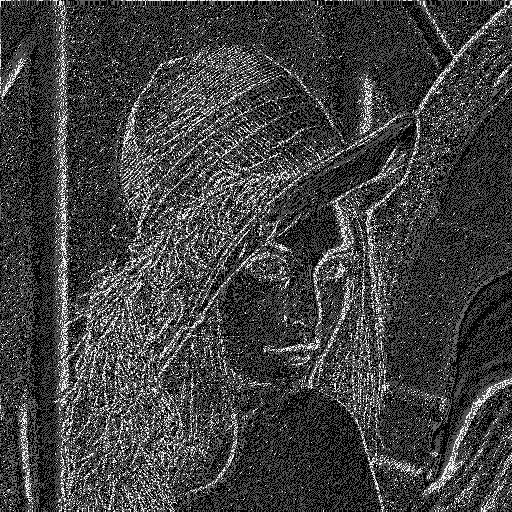

In [ ]:
enc_mat_pic = enc_mat.astype(np.uint8)
img = Image.fromarray(enc_mat_pic)
#img = img.convert("L")
img

In [ ]:
temp_rand = np.random.randint(1,256,(row,col))
rand_mat =  np.zeros([row,col])
#rand_mat = np.unpackbits(rand_mat)
#rand_mat
'''for i in range(row):
  for j in range(col):
    rand_mat[i,j] = np.binary_repr(rand_mat[i,j]).zfill(9)
  
rand_mat'''
for m in range(row):
  for n in range(col):
    bin=[]
    temp = temp_rand[m,n]
    for i in range(9):
      k = 2**i
      val = (math.floor(temp/2**(k-1)))%2
      bin.append(str(val))
    bin.reverse()
    new_integer = str(''.join(bin))
   #new_integer = str(''.join(bin))

    rand_mat[m,n] = new_integer


rand_mat = rand_mat.astype(np.int64)
rand_mat

array([[1101, 1111, 1000, ...,    0, 1010,  111],
       [  11, 1011, 1001, ...,   10,  110,  101],
       [1001, 1011,   11, ...,    1,  100,    1],
       ...,
       [1110,   11,   11, ...,  100,    1, 1111],
       [  10, 1010,  101, ...,    1, 1101,    1],
       [   0, 1011, 1000, ..., 1001, 1001, 1110]])

In [ ]:
xor_enc = np.zeros([row,col])
for i in range(row):
  for j in range(col):
    xor_enc[i,j] = np.binary_repr(np.bitwise_xor(int(enc_mat[i,j]),int(rand_mat[i,j])))
    


xor_enc = xor_enc.astype(np.int64)
xor_enc

array([[11110111111, 11110100101,       11010, ..., 10001001101,
        11110100100,  1110000111],
       [ 1111111001,  1111110011,  1111101001, ..., 10001011100,
         1110000111,  1110010111],
       [      11011,  1111110011,        1011, ..., 10001010111,
         1110001101,  1111110011],
       ...,
       [10000111000, 10001000111,           0, ...,     1100101,
        10001010110, 10001010111],
       [    1100101,  1111110011,        1010, ...,        1011,
        10001001100,     1100100],
       [    1101111,  1111110011,  1110000111, ...,  1111100010,
         1111100011, 10001011100]])

In [ ]:
def bintoint(bin):
  str_bin = str(bin)
  len_bin = len(str_bin)
  res = 0
  for i in range(len_bin):
    res = res + int(str_bin[i])*2**(len_bin-i-1)
  return res


inc_img_mat =  np.zeros([row,col])
#inc_img_mat
#print(bintoint(xor_enc[0,1]))
for i in range(row):
  for j in range(col):
    inc_img_mat[i,j] = bintoint(xor_enc[i,j])

inc_img_mat


array([[1983., 1957.,   26., ..., 1101., 1956.,  903.],
       [1017., 1011., 1001., ..., 1116.,  903.,  919.],
       [  27., 1011.,   11., ..., 1111.,  909., 1011.],
       ...,
       [1080., 1095.,    0., ...,  101., 1110., 1111.],
       [ 101., 1011.,   10., ...,   11., 1100.,  100.],
       [ 111., 1011.,  903., ...,  994.,  995., 1116.]])

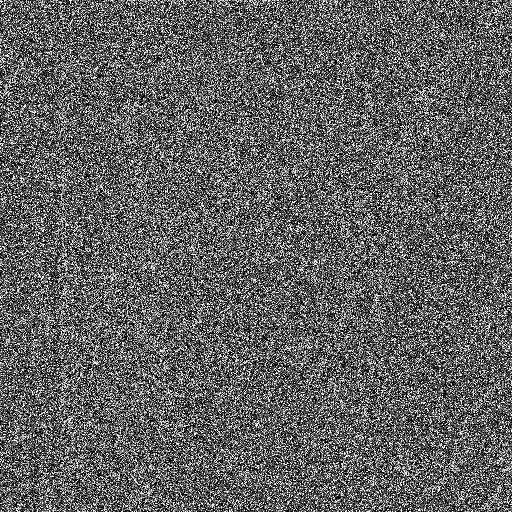

In [ ]:
#xor_enc = xor_enc.astype(np.uint8)
xor_enc_img = inc_img_mat.astype(np.uint8)
img = Image.fromarray(xor_enc_img)
#img = img.convert("L")
img

### Pixel Grouping

In [ ]:
a=3;b=2
na = (2**b - 1)*2**(a-b)
print(na)

def embed(err):
  if (math.ceil(-na/2)<= err) & (math.floor((na-1)/2)>=err):
    return True
  else: 
    return False




In [ ]:
group_mat = np.empty([row,col])
group_mat = group_mat.astype('str')
for i in range(row):
  for j in range(col):
      if (i==0)|(j==0):
        group_mat[i,j] = 'Pr'
      elif (i==row)&(j==col):
        group_mat[i,j] == 'Ps'
      else :
        if (embed(predc_mat[i,j])):
          group_mat[i,j] = 'Pe'
        else :
          group_mat[i,j] = 'Pn'

group_mat
    


array([['Pr', 'Pr', 'Pr', ..., 'Pr', 'Pr', 'Pr'],
       ['Pr', 'Pe', 'Pe', ..., 'Pn', 'Pn', 'Pn'],
       ['Pr', 'Pe', 'Pe', ..., 'Pn', 'Pn', 'Pn'],
       ...,
       ['Pr', 'Pn', 'Pn', ..., 'Pn', 'Pn', 'Pe'],
       ['Pr', 'Pe', 'Pn', ..., 'Pe', 'Pn', 'Pn'],
       ['Pr', 'Pe', 'Pn', ..., 'Pn', 'Pe', 'Pe']], dtype='<U32')

In [ ]:
def reverse(num_arr):
  temp_arr = np.zeros([row,col])
  for i in range(row):
    for j in range(col):
      temp_str = str(num_arr[i,j])
      
      li = list(temp_str.strip())
          
      rev_n = li.reverse()
      
      temp_arr[i,j] = str(''.join(li))

  return temp_arr 


rev_arr = reverse(xor_enc)
rev_arr =rev_arr.astype(np.int64)
rev_arr
